##### Импортируем библиотеки

In [58]:
import piplite
await piplite.install('seaborn')

In [59]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

##### Создаём объект boston_dataset конструктором класса load_boston

In [64]:
boston_dataset = load_boston()

/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func

##### Загружаем данные из csv файла

In [33]:
data = pd.read_csv('table.csv', delimiter=',')
print(data)

     anchor_ratio  trans_range  node_density  iterations       ale    sd_ale
0              30           15           200          40  0.773546  0.250555
1              15           15           100          70  0.911941  0.498329
2              30           15           100          50  0.814867  0.255546
3              15           20           100          20  1.435332  0.394603
4              30           15           100          40  1.265909  0.302943
..            ...          ...           ...         ...       ...       ...
102            18           23           100          20  1.287472  0.375227
103            14           17           200          60  0.899102  0.231822
104            15           20           100          50  1.171140  0.372001
105            20           20           100          40  1.234493  0.599834
106            15           15           200          40  0.635426  0.139791

[107 rows x 6 columns]


##### Рисуем гисторграмму для столбика №1

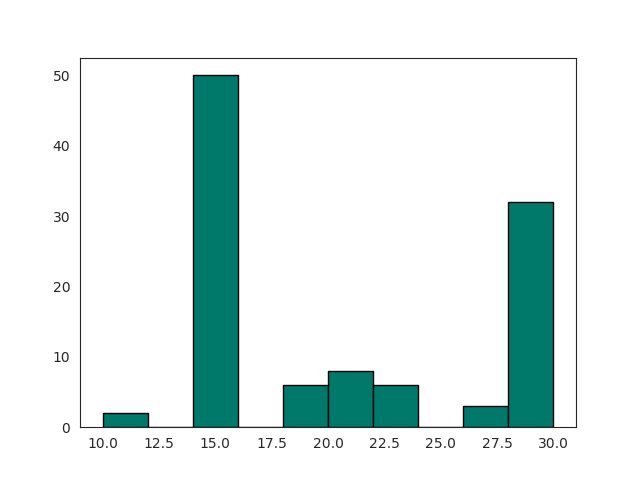

In [66]:
plt.figure()
plt.hist(data['anchor_ratio'], ec='black', color='#00796b')
plt.show()

##### Рисуем гисторграмму для столбика №2

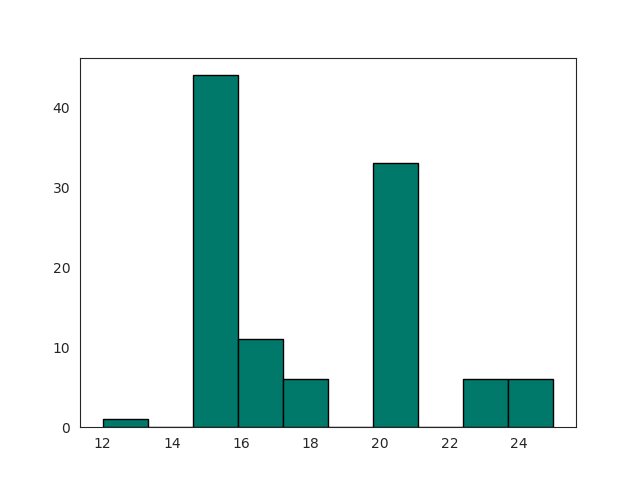

In [35]:
plt.figure()
plt.hist(data['trans_range'], ec='black', color='#00796b')
plt.show()

##### Рисуем гисторграмму для столбика №3

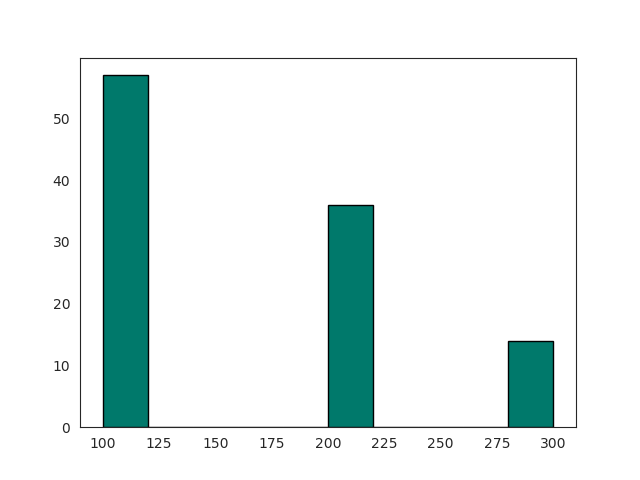

In [36]:
plt.figure()
plt.hist(data['node_density'], ec='black', color='#00796b')
plt.show()

##### Рисуем гисторграмму для столбика №4

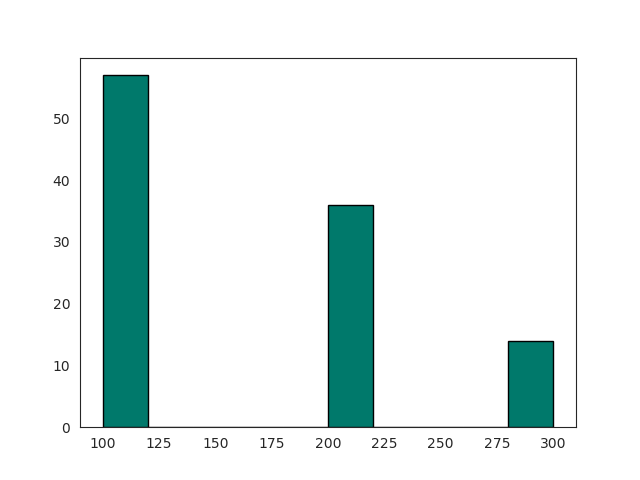

In [36]:
plt.figure()
plt.hist(data['node_density'], ec='black', color='#00796b')
plt.show()

##### Рисуем гисторграмму для столбика №5

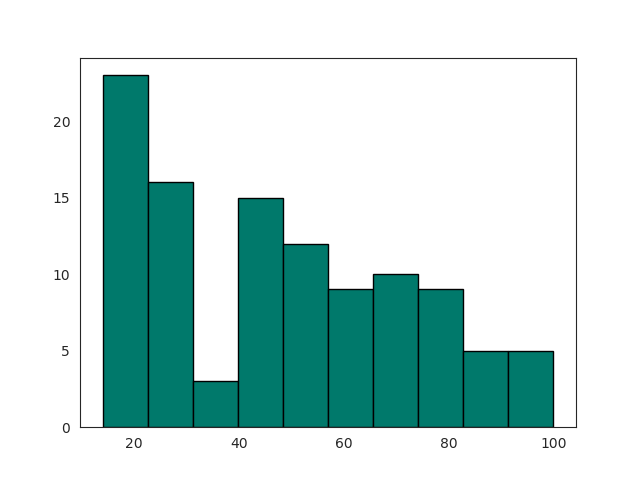

In [37]:
plt.figure()
plt.hist(data['iterations'], ec='black', color='#00796b')
plt.show()

##### Рисуем гисторграмму для столбика №6

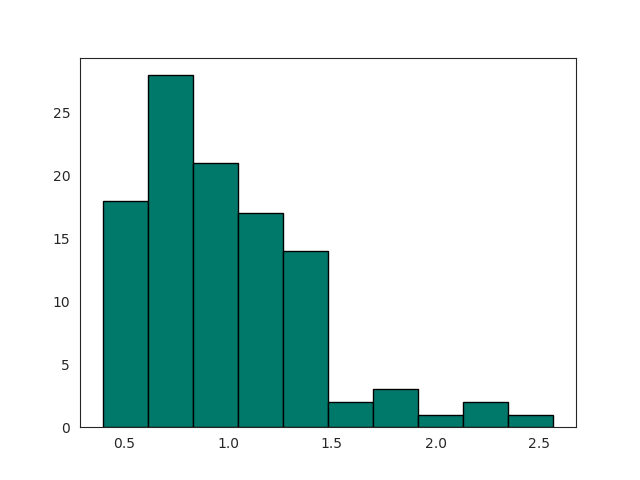

In [38]:
plt.figure()
plt.hist(data['ale'], ec='black', color='#00796b')
plt.show()

##### Выводим коэфициенты корреляции каждого параметра

In [39]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 1.]])

##### Cтроим тепловую карту этих корреляций

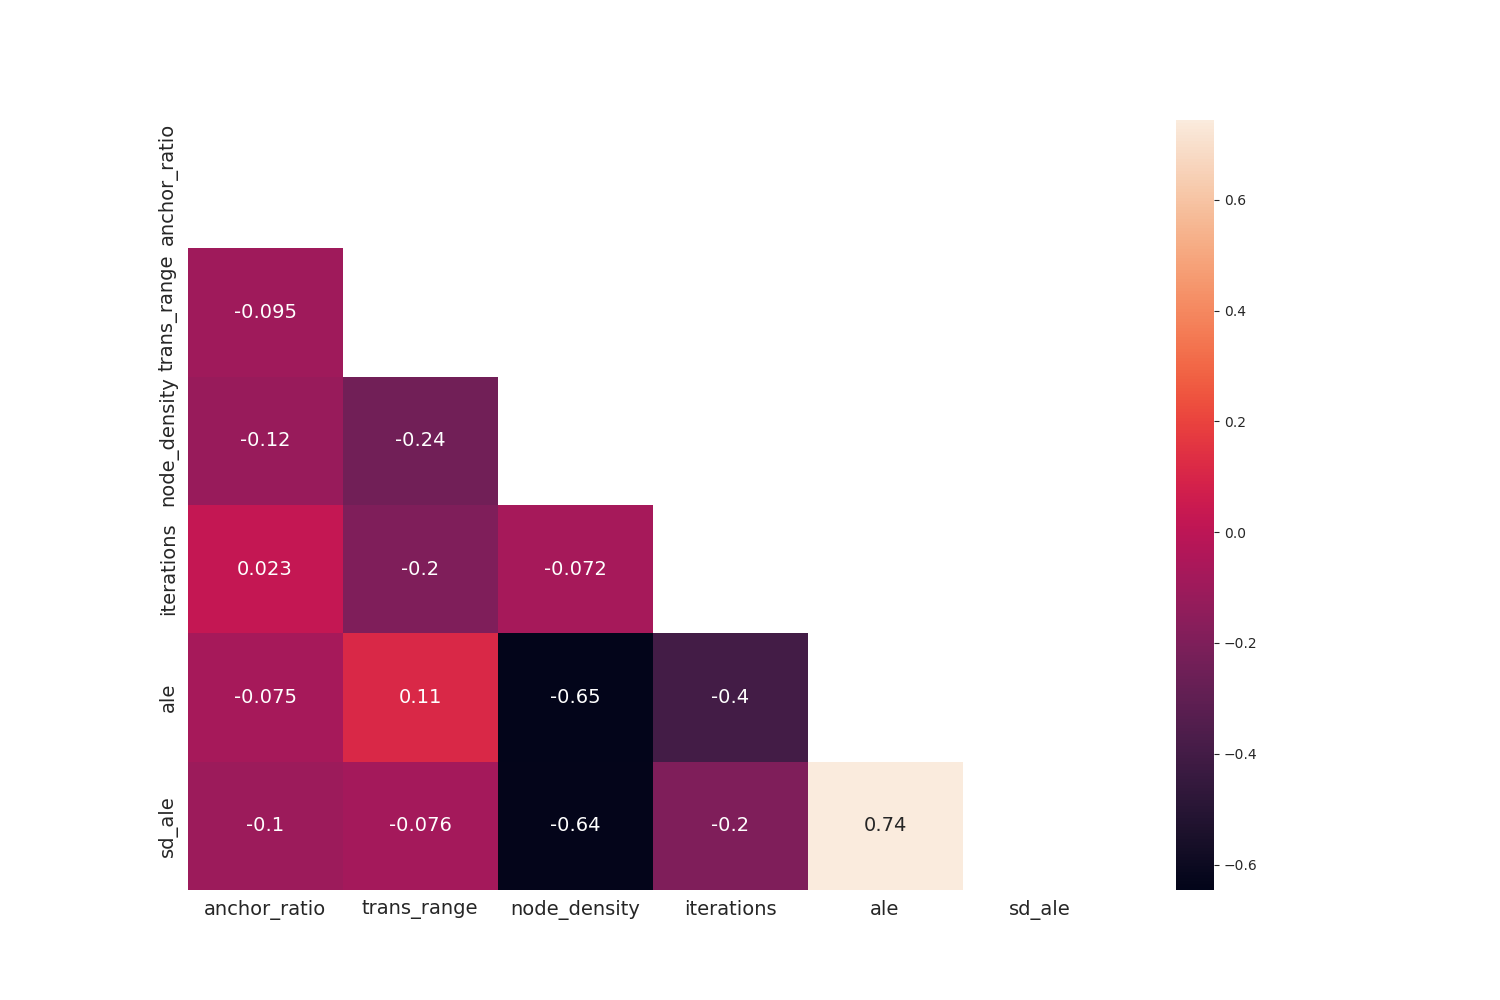

In [40]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={'size': 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

##### Составляем линейную регрессию и определяем итоговый коэффициент и intercept для модели №1

In [41]:
x = np.array(data['anchor_ratio']).reshape((-1, 1))
y = np.array(data['ale'])

model1 = LinearRegression().fit(x, y)

print(f'Коэффициент детерминации: {model1.score(x, y)}')
print(f'Интерцепт: {model1.intercept_}')
print(f'Коэффицент: {model1.coef_[0]}')

Коэффициент детерминации: 0.0056246135668754915
Интерцепт: 1.0767225632713422
Коэффицент: -0.004543690738630977


##### Составляем линейную регрессию и определяем итоговый коэффициент и intercept для модели №2

In [42]:
x = np.array(data['trans_range']).reshape((-1, 1))
y = np.array(data['ale'])

model2 = LinearRegression().fit(x, y)

print(f'Коэффициент детерминации: {model2.score(x, y)}')
print(f'Интерцепт: {model2.intercept_}')
print(f'Коэффицент: {model2.coef_[0]}')

Коэффициент детерминации: 0.011948396959491459
Интерцепт: 0.7266644855844975
Коэффицент: 0.01436396730290578


##### Составляем линейную регрессию и определяем итоговый коэффициент и intercept для модели №3

In [43]:
x = np.array(data['node_density']).reshape((-1, 1))
y = np.array(data['ale'])

model3 = LinearRegression().fit(x, y)

print(f'Коэффициент детерминации: {model3.score(x, y)}')
print(f'Интерцепт: {model3.intercept_}')
print(f'Коэффицент: {model3.coef_[0]}')

Коэффициент детерминации: 0.4172217579204366
Интерцепт: 1.57554471677975
Коэффицент: -0.0037047903676861557


##### Составляем линейную регрессию и определяем итоговый коэффициент и intercept для модели №4

In [44]:
x = np.array(data['iterations']).reshape((-1, 1))
y = np.array(data['ale'])

model4 = LinearRegression().fit(x, y)

print(f'Коэффициент детерминации: {model4.score(x, y)}')
print(f'Интерцепт: {model4.intercept_}')
print(f'Коэффицент: {model4.coef_[0]}')

Коэффициент детерминации: 0.16031556573386607
Интерцепт: 1.3008346874270955
Коэффицент: -0.00662723304970711


##### Строим модель множественной регрессии для 4 аттрибутов к target-у. Выводим итоговый массив коэффициентов и итоговый intercept. 

In [67]:
x = data['ale']
y = data.drop('ale', axis=1)

X_train, X_test, y_train, y_test = train_test_split(y, x, test_size=0.2, random_state=10)

model = LinearRegression().fit(X_train, y_train)

print(f'Коэффициенты: {model.coef_}')
print(f'Итоговый интерцепт: {model.intercept_}')


Коэффициенты: [-0.00848473 -0.00488305 -0.00262883 -0.00609827  0.72302974]
Итоговый интерцепт: 1.7586727152391572
